<div style="text-align: right"><b> Jessenia Piza Londoño, Laura Alejandra Salazar & Paula Lorena Lopez Romero. </b></div>

# Taller 4: Operaciones morfologicas en imagenes en tonos de grises


Importamos las librerías que utilizaremos a lo largo del taller

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
from matplotlib import cm

Creamos una función para visualizar las imágenes originales y las imágenes filtradas.

In [3]:
def plot_images(original, filtered):
    fig, ax = plt.subplots(1,2, figsize=(15,15))
    ax[0].imshow(original, cmap = 'gray')
    ax[0].set_title('Imagen original')
    ax[1].imshow(filtered, cmap = 'gray')
    ax[1].set_title('Imagen filtrada')

Leemos la imagen que utilizaremos para probar la implementación del algortimo de erosión y dilatación mas adelante.

In [4]:
lion = cv2.imread('leon.jpg')
lion = cv2.cvtColor(lion, cv2.COLOR_BGR2GRAY)

## Erosión
Implementamos el algortimo de erosión teniendo en cuenta la imagen y el kernel.

In [5]:
def erosion(img, kernel):
    matrix = np.zeros(img.shape)
    image = cv2.copyMakeBorder(img, kernel.shape[0], kernel.shape[0], kernel.shape[1], kernel.shape[1], cv2.BORDER_REFLECT)
    for n in range(img.shape[0]-1):
        for m in range(img.shape[1]-1):
            A = image[n:n+kernel.shape[0], m:m+kernel.shape[1]] 
            kernel_vals = [qq for q in kernel.tolist() for qq in q]
            vals_min = [qq for q in np.multiply(A, kernel).tolist() for qq in q]
            vals_min = [vals_min[idx] for idx in range(len(vals_min)) if kernel_vals[idx] == 1]
            if len(vals_min) == 0:
                vals_min = [0]
            val = min(vals_min)
            matrix[n,m] = val
    return matrix

A lo largo del taller se utilizarán los siguientes kernel.

In [6]:
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]], dtype=np.uint8)

In [7]:
kernel_1 = np.array([[0, 1, 1, 0, 0],
                    [1, 1, 1, 1, 0],
                    [0, 1, 1, 0, 0],
                    [0, 1, 1, 0, 0],
                    [0, 1, 1, 0, 1]], dtype=np.uint8)

De esta manera, obtenemos el siguiente ejemplo:

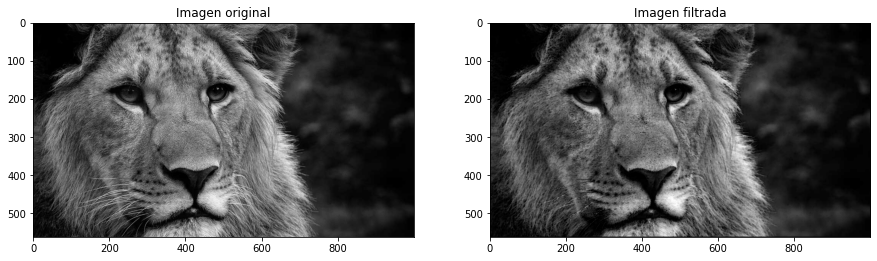

In [8]:
img_trans = erosion(lion, kernel)
plot_images(lion, img_trans)

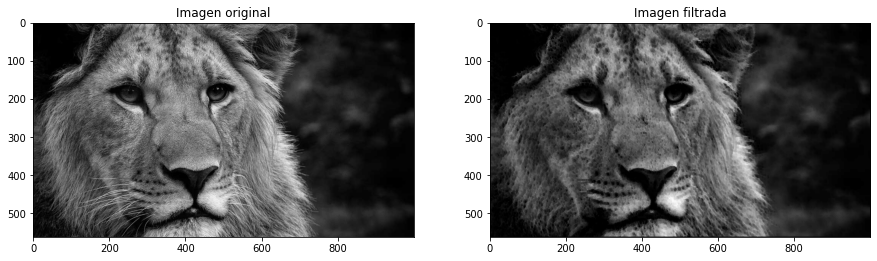

In [9]:
img_trans = erosion(lion, kernel_1)
plot_images(lion, img_trans)

Note que el algortimo de erosión produce un incremento en el contraste de la imagen. De esta manera, aumenta los negros y difumina los bordes dándole una aspecto más sombrío a la imagen. Por esta razón, como podemos ver en los ojos del león, pierde su definición y se ven más oscuros. Notamos que como el segundo kernel es más grande y tiene mayor cantidad de 1's, por lo que la imagen al erosionarla se ve más oscura que con el primer kernel.

## Dilatación
Ahora bien, implementamos el algortimo de dilatación.

In [10]:
def dilation(img, kernel):
    matrix = np.zeros(img.shape)
    image = cv2.copyMakeBorder(img, kernel.shape[0], kernel.shape[0], kernel.shape[1], kernel.shape[1], cv2.BORDER_REFLECT)
    for n in range(img.shape[0]-1):
        for m in range(img.shape[1]-1):
            A = image[n:n+kernel.shape[0], m:m+kernel.shape[1]] 
            kernel_vals = [qq for q in kernel.tolist() for qq in q]
            vals_max = [qq for q in np.multiply(A, kernel).tolist() for qq in q]
            vals_max = [vals_max[idx] for idx in range(len(vals_max)) if kernel_vals[idx] == 1]
            if len(vals_max) == 0:
                vals_max = [0]
            val = max(vals_max)
            matrix[n,m] = val
    return matrix

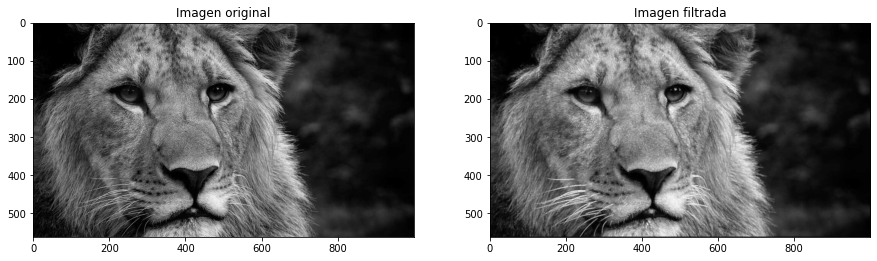

In [11]:
img_trans = dilation(lion, kernel)
plot_images(lion, img_trans)

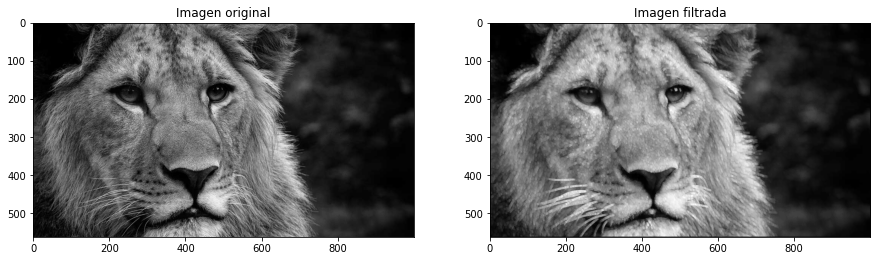

In [12]:
img_trans = dilation(lion, kernel_1)
plot_images(lion, img_trans)

Note que al dilatar la imagen, se realiza el proceso contrario. El algoritmo incrementa la intensidad y por lo tanto, los blancos aumentan y los bordes se difuminan, obteniendo así una imagen más clara, es decir, con más luz. Además, nuevamente se ve la diferencia del kernel dado que cuando tenemos el segundo kernel, la imagen es mucho más clara y la intensidad de los tonos blancos en la imagen aumenta, por lo que también se pierde la nitidez en algunas partes como los bigotes del león.

De esta forma, podemos concluir que estos algortimos se pueden utilizar para la visualización de imagenes en donde la imagen tenga mucha luminosidad o mucho contraste. Al aplicarlos, las imagenes tendrán una mejor definición y los detalles que se perdían, serán más visibles, dependiendo del kernel que se utilice.

## Top-hat

Los algortimos de top-hat y bottom-hat transformation, sirven para corregir diferencias de iluminación del fondo. En este trabajo, utilizaremos el algoritmo de top-hat para corregirlas.

Primero definimos las funciones de `opening` y `closing` que se utilizarán  más adelante.

In [13]:
def opening(img, kernel):
    img_erosion = erosion(img, kernel)
    img_opening = dilation(img_erosion, kernel)
    return img_opening 

In [14]:
def closing(img, kernel):
    img_dilation = dilation(img, kernel)
    img_closing = erosion(img_dilation, kernel)
    return img_closing

Creamos la función de `top-hat` transformation

In [15]:
def top_hat(img, kernel):
    matrix = img - opening(img, kernel)
    matrix[np.where(matrix<0)] = 0
    return matrix

Para visualizar los problemas de luz y ver su correción con el algoritmo, decidimos utilizar una imagen de la galaxia de Andrómeda y otra del sol.

In [17]:
andromeda = cv2.imread('andromeda.jpg')
andromeda = cv2.cvtColor(andromeda, cv2.COLOR_BGR2GRAY)

In [18]:
sol = cv2.imread('sol.jpg')
sol = cv2.cvtColor(sol, cv2.COLOR_BGR2GRAY)

Primero visualizamos el algoritmo con la imagen de la Andrómeda.

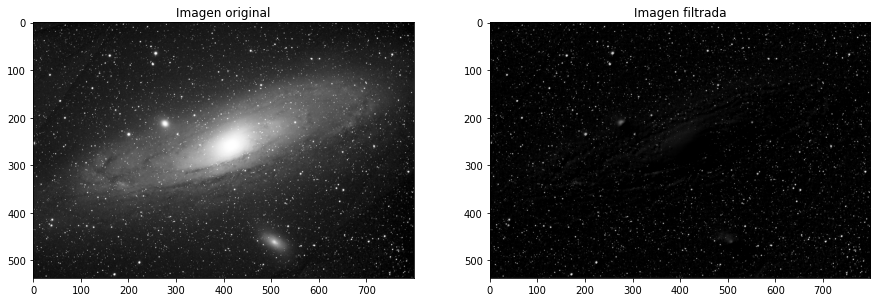

In [19]:
img_trans = top_hat(andromeda, kernel)
plot_images(andromeda, img_trans)

¿Qué pueden concluir?, ¿El algortimo es igual de efectivo para todas las imagenes? ¿Pueden automatizarlo para que de forma automatica encuentre las diferentcias de iluminación en el fondo?

Luego, realizamos el mismo procedimiento con la imagen del sol.

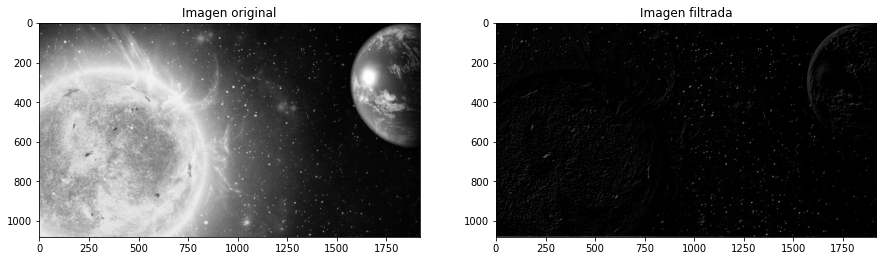

In [21]:
img_trans = top_hat(sol, kernel)
plot_images(sol, img_trans)

Note que, estos algortimos filtran la fuente de luz de la imagen, convirtiéndola en una imagen casi uniforme en donde el contraste no se vea tanto de color y tonos no se vea tanto. Además, notamos que en la imagen del Sol, la luminosidad del sol se logró solucionar casi por completo, pero la de la tierra no mucho. Lo mismo sucede con la Andrómeda en algunos puntos de luz que hay pero que no son tan fuertes como el principal, por lo que, apacigüa la luminosidad pero no la elimina por completo. De esta manera, el algoritmo no es igual de efectivo para todas las imágenes, eso depende de la luminosidad que contenga la imagen.

Se podría automatizar y hallar el tono más predominante en la imagen (o identificar si el fondo tiene mayor intensidad de luz o es más oscuro), de esta manera, se podría en vez de corregir los problemas de luminosidad donde se vean destellos más claros o más oscuros dependiendo de la imagen. 

## Granulometría

Implementamos el algortimo de granulometría. A medida que va analizando los diferentes tamaños de objetos que  encuentra en la imagen, va cambiando su forma original. El algoritmo recibe la imagen, la cantidad de veces que va a cambiar el tamaño del kernel y la función que determina si se va a realizar opening o closing. Esto depende del fondo de la imagen, si este es blanco, se debe realizar closing, en caso contrario, opening.

In [36]:
def granulometry(img, val, function):
    se_list = [i for i in range(3,val,2)]
    img_p = img.copy()
    for i in se_list:
        kernel = np.ones((i,i))
        img_result = function(img, kernel)
        img_p = img_result.copy()
    return img_result

Como primero, escogimos una imagen más fina donde se logra ver los diferentes tamaños de los objetos, en este caso, circulos.  

In [43]:
bolas = cv2.imread('bolas.jpg')
bolas = cv2.cvtColor(bolas, cv2.COLOR_BGR2GRAY)

Notamos que al utilizar 10 elementos estructurales, la imagen tiene cambios en los circulos más pequeños y en su color pero no cambia mucho de la original.

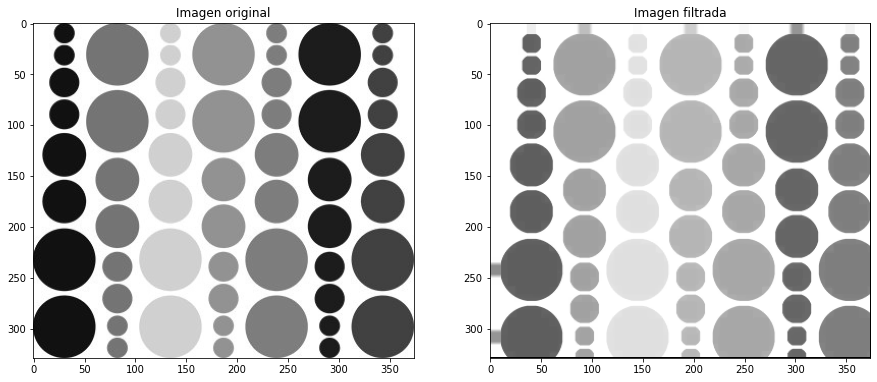

In [44]:
bolas_10 = granulometry(bolas, 10, closing)
plot_images(bolas,bolas_10)

Con 20 elementos estructurales, notamos que algunos círculos desaparecen y todos han cambiado su estructura.

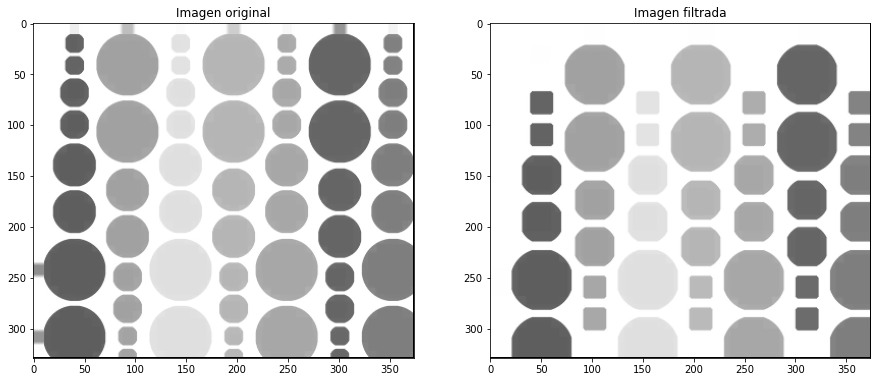

In [45]:
bolas_20 = granulometry(bolas, 20, closing)
plot_images(bolas_10,bolas_20)

Por último, con 30 elementos estructurales, se reduce mucho más la cantidad de elementos en la imagen. De esta manera, las texturas de la imagen, se van reduciendo a medida que se aumentan los elementos estructurales escogidos.

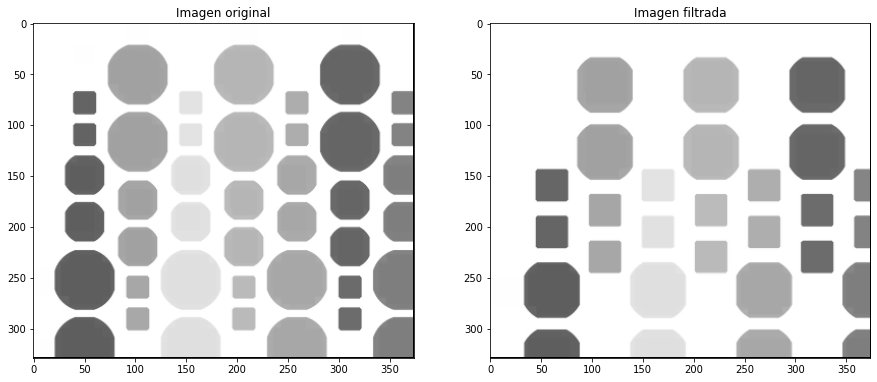

In [46]:
bolas_30 = granulometry(bolas, 30, closing)
plot_images(bolas_20,bolas_30)

Como segunda imagen, escogimos una bacteria, la cual contiene muchas texturas y demasiados tonos distintos. Esto con el fin de observar el comportamiento del algoritmo con una imagen más compleja.

In [37]:
bacteria = cv2.imread('bacteria.jpg')
bacteria = cv2.cvtColor(bacteria, cv2.COLOR_BGR2GRAY)

En este caso, como el fondo de la imagen es oscuro, utilizamos opening para realizar la granulación. Al realizar la granulación con 10 elementos estructurales, notamos que las texturas de la imagen original se apaciguan pero no se eliminan.

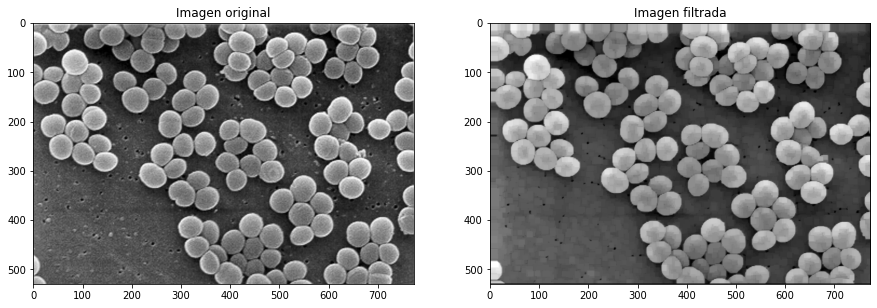

In [38]:
gran_10 = granulometry(bacteria, 10, opening)
plot_images(bacteria,gran_10)

Al utilizarlo con 15 elementros estructurales, la imagen se logra ver un poco más plana en cuanto color y texturas.

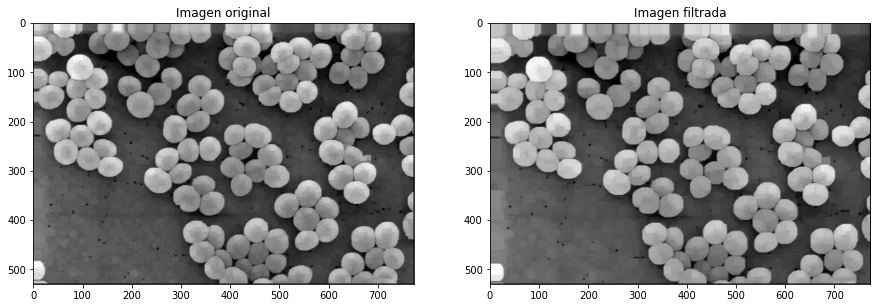

In [41]:
gran_15 = granulometry(bacteria, 15, opening)
plot_images(gran_10,gran_15)

Por último, lo realizamos con 25 elementos estructurales y notamos que el tamaño de las texturas va bajando. Así, a medida que va aumentando los elementos estructurales, se es capaz eliminar texturas de la imagen original. Sin embargo, por el costo computacional y el tiempo de ejecución, decidimos realizarlo hasta 25 elementos estructurales.

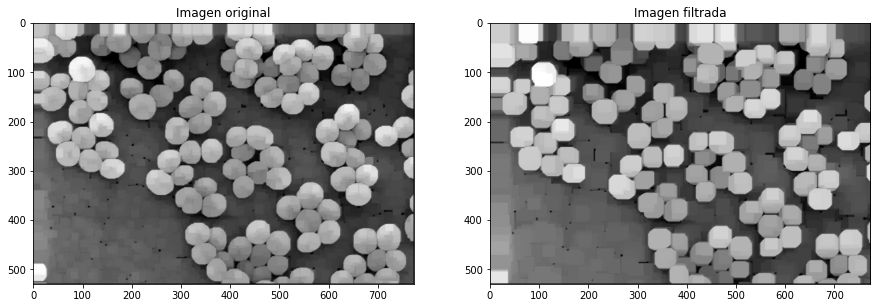

In [42]:
gran_25 = granulometry(bacteria, 25, opening)
plot_images(gran_15,gran_25)

Del algoritmo se puede concluir que, a medida que se utilizan más elementos estructurales, se pueden quitar todas las texturas de una imagen original. Además, entre más diferencia de color y de texturas haya en la imagen, se requieren más elementos. Además, para un buen funcionamiento del algoritmo, se debe observar el fondo de la imagen para determinar si se utiliza opening o closing a la hora de realizarlo.

Para desarrollar un algoritmo que detecte más texturas diferentes usando granulometría, se tendría que mirar las diferencias de color en la imagen, para identificar qué partes de esta, se considera textura. De esta manera, considerando eso, se puede utilizar el algoritmo de granulometría en texturas más pequeñas donde el color se diferencie pero que en un principio el algoritmo solo no las detecte.

## Imagen a color

Ahora implementamos todos los algortimos anteriormente usados para una imagen a color. Escogimos la imagen de un gatito donde se logran ver diferentes texturas y colores para observar el comportamiento de cada uno de los algoritmos. 

In [48]:
gatito = cv2.imread('gatito.jpg')
gatito = cv2.cvtColor(gatito, cv2.COLOR_BGR2RGB)

Creamos la función para plotear las imágenes a color.

In [49]:
def plot_images_color(original, filtered):
    fig, ax = plt.subplots(1,2, figsize=(15,15))
    ax[0].imshow(original)
    ax[0].set_title('Imagen original')
    ax[1].imshow(filtered)
    ax[1].set_title('Imagen filtrada')

Además, definimos la función que realiza cada uno de los métodos con un kernel específico.

In [65]:
def imagen_color(img,kernel,method):
    matrix_img = np.zeros(img.shape,dtype=int)
    for i in range(3):
        new_matrix = img[:,:,i]
        matrix_img[:,:,i] = method(new_matrix, kernel)
    return matrix_img

Dado que a la función de granulometría, le entra la función de closing u opening y el valor para los elementos estructurales a realizar, decidimos realizar esta función apartde de la `imagen_color`.

In [66]:
def granulometry_color(img,val,function):
    matrix_img = np.zeros(img.shape,dtype=int)
    for i in range(3):
        new_matrix = img[:,:,i]
        matrix_img[:,:,i] = granulometry(new_matrix,val,function)
    return matrix_img

## Dilatación

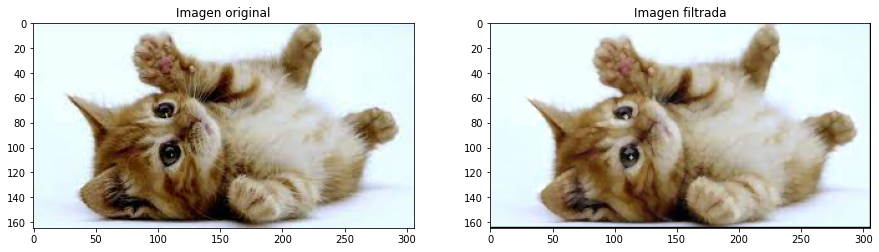

In [62]:
dilation_color = imagen_color(gatito,kernel,dilation)
plot_images_color(gatito,dilation_color)

Observamos que, como la imagen tiene varios puntos de luz, estos se incrementan con la dilatación. Así, la imagen se ve más difuminada, dado que se aumentó el brillo de los ojos y el pelo del gato.

## Erosión

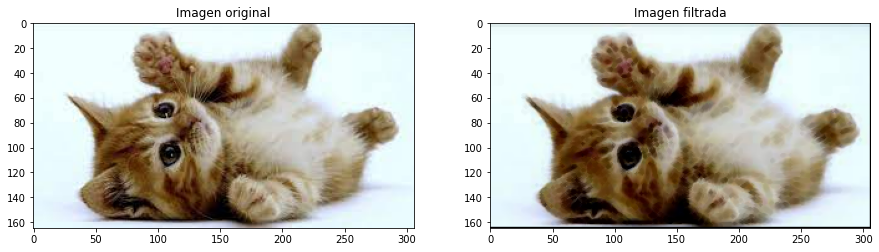

In [63]:
erosion_color = imagen_color(gatito,kernel,erosion)
plot_images_color(gatito,erosion_color)

En este, detecta los lugares más oscuros de la imagen y por esto, los ojos se ven más negros y otros lugares de la imagen que aumentan sus tonos oscuros.

## Top-hat transform

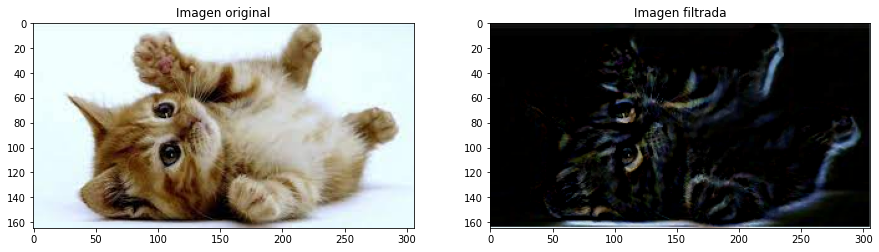

In [64]:
top_hat_color = imagen_color(gatito, kernel, top_hat)
plot_images_color(gatito, top_hat_color)

Notamos que, como el top-hat pretende mejorar la imagen en luminosidad, dado que la imagen está bien iluminada y se realizó para cuando el fondo es oscuro, pone todo el fondo del gato en netro y tarat de mejorar la luz de la imagen oscureciendo las partes claras de la imagen.

## Granulometría

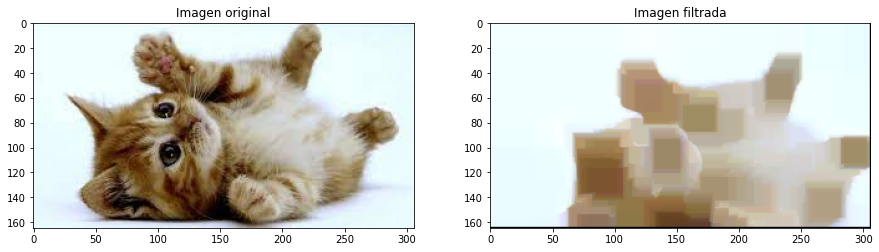

In [68]:
grano_color = granulometry_color(gatito,20,closing)
plot_images_color(gatito, grano_color)

Al realizarlo con 20 elementos estructurales, notamos que la imagen se ve como una mancha. Dado que las texturas que identifica en el gato es prácticamente el gato completo. Así, vemos cómo va desapareciendo la imagen.

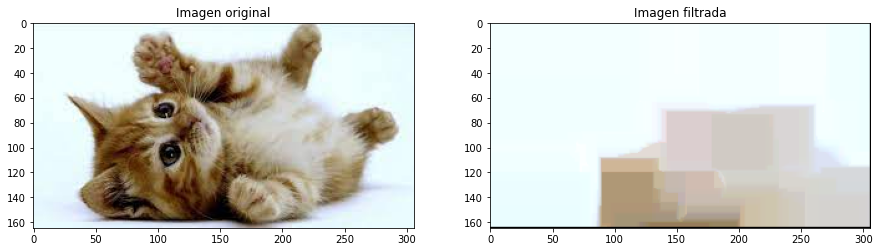

In [67]:
grano_color = granulometry_color(gatito,40,closing)
plot_images_color(gatito, grano_color)

Cuando realizamos el mismo procedimiento con 40 elementos estructurales, notamos que ya la forma del gato no se logra identificar y que la imagen, probablemente, vaya a desaparecer con más elementos estructurales.

Si bien los algoritmos se comportan de manera adecuada en las imágenes a color, notamos que estos se comportan mucho mejor en las imágenes a blanco y negro. Sin embargo, terminamos con unos resultados satisfechos al utilizar operaciones morfológicas en imágenes a color.

<div style="text-align: right"><b> Jessenia Piza Londoño, Laura Alejandra Salazar & Paula Lorena Lopez Romero. </b></div>